In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_airbnb = pd.read_csv('airbnb-listings.csv', delimiter=';')

In [3]:
df_airbnb.shape

(14780, 89)

In [4]:
#the most part of features are of object type, might need to split these fields to create categorical variables
df_airbnb.dtypes.value_counts()

object     53
float64    23
int64      13
dtype: int64

In [5]:
#some columns might be uninformative or difficul to use
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

In [6]:
'''Host Acceptance Rate, Square Feet,  Has Availability, Jurisdiction Names (and License but this one can be explained)
have too many null values, it might be best to exclude these columns,
as well as Neighbourhood column that is duplicated with Neighbourhood Cleansed.
'''
#keep only the relevant columns
df_airbnb.drop(['Host Acceptance Rate', 'Square Feet', 'Has Availability', 'Jurisdiction Names', 'Neighbourhood'], axis=1, inplace=True)
df_airbnb.shape

(14780, 84)

In [7]:
#URL columns don't seem informative either
df_airbnb.drop(df_airbnb.filter(like='Url'), axis=1, inplace=True)
df_airbnb.shape

(14780, 77)

In [8]:
#there are listings from other countries as well
df_airbnb['Country'].unique()

array(['United Kingdom', 'Spain', 'United States', 'Canada',
       'Switzerland', 'Hong Kong', 'Cuba', 'Germany', 'Belgium',
       'Netherlands', 'Italy', 'Australia', 'Austria', 'France',
       'Denmark', 'Ireland', 'Greece', nan], dtype=object)

In [9]:
#the only entry with Null country doesn't seem relevant
df_airbnb[df_airbnb['Country'].isna()]

,ID,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,...,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
14183,1553260,20170407214119,2017-04-08,¡Urgente! Busco Piso en Madrid,Hola me llamo Filomena soy Italiana tengo 24 c...,NaN,Hola me llamo Filomena soy Italiana tengo 24 c...,none,NaN,Preferiría compartir el piso con chicas amigab...,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"40.47671328643674, -3.571889701578535","Host Has Profile Pic,Is Location Exact"


In [10]:
#include only listings for Spain
df_airbnb_spain = df_airbnb.query("Country == 'Spain'")

In [11]:
#there is a mix of Madrid districts and places from other regions
df_airbnb_spain['City'].unique()

array(['Madrid', 'Palma', 'Palma de Mallorca', 'Selva',
       'Balearic Islands', 'Sant Joan', 'Cala Pi', 'Sa Pobla', 'Muro',
       'Alcúdia', 'Illetes', '马德里', 'Madrid, Comunidad de Madrid, ES',
       'Barcelona', 'Santa Maria del Camí', 'Pollença', 'Bunyola',
       'Pozuelo de Alarcón', 'Provensals', 'Deià', 'Costitx', 'Campos',
       'Peguera, Calvià', 'Torrenova', "Port d'Andratx", 'Llucmajor',
       'Sant Llorenç des Cardassar', 'Puerto ALCUDIA', 'Sóller',
       'Valldemossa', 'Pollensa', 'Caimari', 'Inca', '馬德里',
       'Hospitalet de Llobregat', 'Andratx', 'Binissalem',
       'Mancor de la Vall', 'Felanitx', 'Santa Margalida',
       'Madrid, Vallecas (Fontarrón)', 'Campanet', 'Sol de Mallorca',
       'Sa Colònia', 'Son Veri Nou , Llucmajor', 'Delicias', 'Manacor',
       'Pozuelo', 'Can Pastilla', 'Alaró', 'Porreres', 'Costa dels Pins',
       'Madrid, Comunidad de Madrid, ESPANA', 'las matas  madrid',
       'Illes Balears', 'Calvià', 'madrid', 'La Puebla', 'Llubí',
 

In [12]:
#let's have a look at the zipcodes
df_airbnb_spain['Zipcode'].unique()

array(['28005', '28013', nan, '28012', '28014', '28004', '28015', '28008',
       '28045', '07010', '07012', '28017', '28027', '28043', '28021',
       '07313', '28003', '28010', '07240', '07639', '28002', '28016',
       '28036', '28039', '28020', '28046', '28029', '07011', '28028',
       '28006', '28001', '28009', '28007', '07420', '07440', '07400',
       '07181', '28035', '28011', '28047', '28024', '28044', '28019',
       '28025', '28038', '28053', '28026', '28018', '28030', '28031',
       '28051', '28052', '28032', '28037', '28022', '28042', '08009',
       '08002', '08029', '08008', '08025', '08028', '08022', '08014',
       '08018', '08021', '08012', '08037', '08003', '08010', '08001',
       '08007', '08015', '08005', '07320', '07458', '28041', '28054',
       '28058', '07001', '07006', '07149', '07008', '28034', '28050',
       '28049', '28023', '28033', '28055', '07589', '07179', '07144',
       '2802\n28012', '27013', '07160', '07157', '07609', '07009',
       '07530', '0

In [13]:
#Should we impute these zipcode so that now to lose 461 rows? If so, how, given that one zipcode can correspond to different districts?
df_airbnb_spain.loc[df_airbnb_spain['Zipcode'].isna(), ['Country', 'City', 'Zipcode', 'Neighbourhood Cleansed']]

,Country,City,Zipcode,Neighbourhood Cleansed
5,Spain,Madrid,NaN,Palacio
6,Spain,Madrid,NaN,Palacio
12,Spain,Madrid,NaN,Embajadores
34,Spain,Madrid,NaN,Embajadores
118,Spain,Madrid,NaN,Universidad
...,...,...,...,...
14596,Spain,Madrid,NaN,Palacio
14599,Spain,Madrid,NaN,Palacio
14614,Spain,Madrid,NaN,Palacio
14687,Spain,Madrid,NaN,Embajadores


In [14]:
#Change City to Madrid for all entries with zipcode starting with 28
df_airbnb_spain.loc[df_airbnb_spain['Zipcode'].isna(), 'Zipcode'] = 'N/A'
df_airbnb_spain.loc[df_airbnb_spain['Zipcode'].str.contains('^28', regex=True), 'City'] = 'Madrid'
df_airbnb_spain['City'].unique()

C:\Software\Anaconda\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


array(['Madrid', 'Palma', 'Palma de Mallorca', 'Selva',
       'Balearic Islands', 'Sant Joan', 'Cala Pi', 'Sa Pobla', 'Muro',
       'Alcúdia', 'Illetes', 'Barcelona', 'Santa Maria del Camí',
       'Pollença', 'Bunyola', 'Provensals', 'Deià', 'Costitx', 'Campos',
       'Peguera, Calvià', 'Torrenova', "Port d'Andratx", 'Llucmajor',
       'Sant Llorenç des Cardassar', 'Puerto ALCUDIA', 'Sóller',
       'Valldemossa', 'Pollensa', 'Caimari', 'Inca',
       'Hospitalet de Llobregat', 'Andratx', 'Binissalem',
       'Mancor de la Vall', 'Felanitx', 'Santa Margalida', 'Campanet',
       'Sol de Mallorca', 'Sa Colònia', 'Son Veri Nou , Llucmajor',
       'Manacor', 'Can Pastilla', 'Alaró', 'Porreres', 'Costa dels Pins',
       'Madrid, Comunidad de Madrid, ESPANA', 'Illes Balears', 'Calvià',
       'La Puebla', 'Llubí', 'Peguera', 'Onil', 'Cala Agulla',
       'Cala Ferrera', 'Santanyí', 'Algaida', 'El Toro', 'Petra', 'Búger',
       'Pina', nan, 'Chiva', 'Son Servera', 'Sa Coma', 'Maioris

In [15]:
df_airbnb_spain[['City', 'Zipcode']].query('City == "Madrid, Comunidad de Madrid, ESPANA"')

,City,Zipcode
3331,"Madrid, Comunidad de Madrid, ESPANA",N/A


In [16]:
#Change City to Madrid for all entries starting with 'Mad'
df_airbnb_spain.loc[df_airbnb_spain['City'].isna(), 'City'] = 'N/A'
df_airbnb_spain.loc[df_airbnb_spain['City'].str.contains('^Mad', regex=True), 'City'] = 'Madrid'

C:\Software\Anaconda\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [17]:
df_airbnb_spain.shape

(14001, 77)

In [56]:
#keep only listings with Madrid properties
df_airbnb_spain = df_airbnb_spain[df_airbnb_spain['City'] == 'Madrid']

In [57]:
#there is ony one scrape date for Madrid  properties
df_airbnb_spain['Last Scraped'].unique()

array(['2017-04-08'], dtype=object)

In [58]:
#See what years there are more new hosts? New commercial hosts?
pd.to_datetime(df_airbnb_spain['Host Since']).dt.year.unique()

array([2014., 2011., 2013., 2012., 2015., 2016., 2017., 2010.,   nan,
       2009.])

In [59]:
#Divide into different columns for additional features?
df_airbnb_spain['Features'].head()

3    Host Has Profile Pic,Host Identity Verified,Is...
4    Host Has Profile Pic,Host Identity Verified,Is...
5    Host Has Profile Pic,Host Identity Verified,Is...
6    Host Is Superhost,Host Has Profile Pic,Host Id...
7    Host Is Superhost,Host Has Profile Pic,Host Id...
Name: Features, dtype: object

In [60]:
#Do all hosts write about themselves?
df_airbnb_spain['Host About'].isna().count()

13324

In [61]:
#Divide into different columns for additional features?
df_airbnb['Amenities'].unique()

array(['Wireless Internet,Kitchen,Smoking allowed,Heating,Washer,Smoke detector,Essentials,Shampoo,Hangers,Iron,Laptop friendly workspace',
       'TV,Wireless Internet,Kitchen,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Hangers,Hair dryer,Iron,Laptop friendly workspace',
       'TV,Wireless Internet,Kitchen,Heating,Family/kid friendly,Smoke detector,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace',
       ...,
       'TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Breakfast,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Keypad',
       'TV,Internet,Wireless Internet,Kitchen,Smoking allowed,Pets allowed,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,First aid kit,24-hour check-in,Ha

<AxesSubplot:xlabel='Room Type', ylabel='Availability 30'>

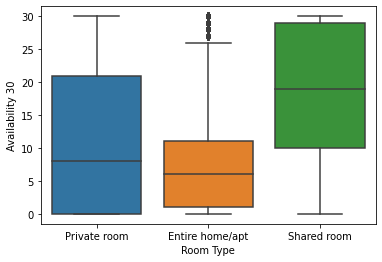

In [62]:
sns.boxplot(data=df_airbnb_spain, y='Availability 30', x='Room Type')

<AxesSubplot:xlabel='Room Type', ylabel='Availability 60'>

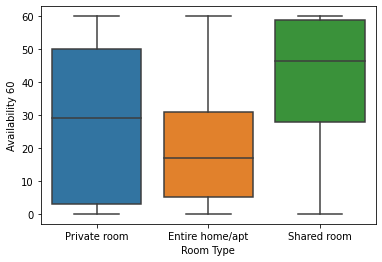

In [63]:
sns.boxplot(data=df_airbnb_spain, y='Availability 60', x='Room Type')

<AxesSubplot:xlabel='Room Type', ylabel='Availability 90'>

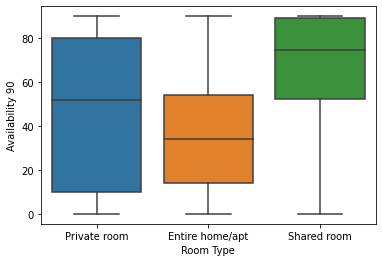

In [64]:
sns.boxplot(data=df_airbnb_spain, y='Availability 90', x='Room Type')

<AxesSubplot:xlabel='Room Type', ylabel='Availability 365'>

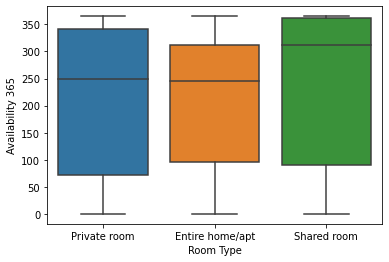

In [65]:
sns.boxplot(data=df_airbnb_spain, y='Availability 365', x='Room Type')

In [66]:
#there is a clear outlier in Minimum Nights
df_airbnb_spain['Minimum Nights'].describe()

count    13324.000000
mean         3.011333
std         12.834126
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max       1125.000000
Name: Minimum Nights, dtype: float64

In [69]:
mask_nights = df_airbnb_spain['Minimum Nights'] < 60

<AxesSubplot:xlabel='Minimum Nights', ylabel='Count'>

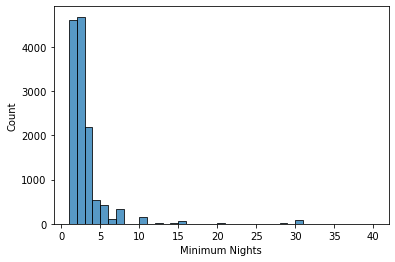

In [68]:
sns.histplot(data=df_airbnb_spain[mask_nights], x='Minimum Nights',binwidth=1)

In [70]:
df_airbnb_spain['Maximum Nights'].describe()

count      13324.000000
mean         959.616782
std         8886.784566
min            1.000000
25%          365.000000
50%         1125.000000
75%         1125.000000
max      1000000.000000
Name: Maximum Nights, dtype: float64

In [71]:
mask_max_nights = df_airbnb_spain['Maximum Nights'] < 1125

<AxesSubplot:xlabel='Maximum Nights', ylabel='Count'>

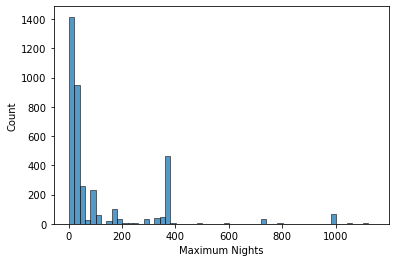

In [72]:
sns.histplot(data=df_airbnb_spain[mask_max_nights], x='Maximum Nights',binwidth=20)

In [73]:
df_airbnb_spain[['Price', 'Host Since', 'Host Response Rate', 'Host Total Listings Count', 'Review Scores Rating']].corr()

,Price,Host Response Rate,Host Total Listings Count,Review Scores Rating
Price,1.000000,-0.009487,0.164517,0.056179
Host Response Rate,-0.009487,1.000000,-0.043204,0.097537
Host Total Listings Count,0.164517,-0.043204,1.000000,-0.171131
Review Scores Rating,0.056179,0.097537,-0.171131,1.000000


<AxesSubplot:xlabel='Host Total Listings Count', ylabel='Price'>

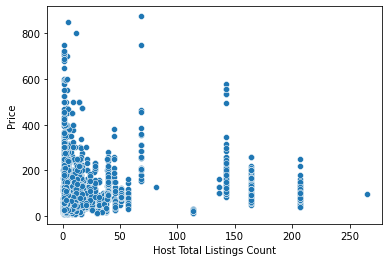

In [74]:
sns.scatterplot(data=df_airbnb_spain, y='Price', x='Host Total Listings Count')

<AxesSubplot:xlabel='Room Type', ylabel='Price'>

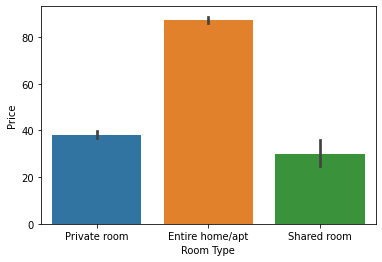

In [75]:
sns.barplot(data=df_airbnb_spain, y='Price', x='Room Type')

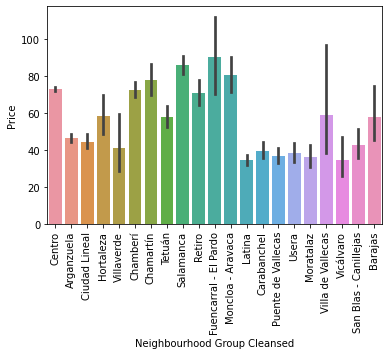

In [76]:
sns.barplot(data=df_airbnb_spain, y='Price', x='Neighbourhood Group Cleansed')
plt.xticks(rotation=90)
plt.show()